PyTorch有四类功能：数据 、网络层、优化方法、预定义模型和数据 。
## 9.4.1 数据预处理
PyTorch封装了一个专门的模块来进行深度学习图片数据的预处理操作——torchvision.transforms, 这个模块封装了随机翻转、随机擦除、随机裁剪、缩放、填充、标淮化等常用数据处理操作,值得注意的是这些操作针对的数据格式为 PIL.Image类或者 torch.Tensor。

PyTorch还封装了torch.Tensor和PIL.Image相互转换的接口：torchvision.transforms. ToTens()和torchvision.transforms.ToPILImage()，方便图片转换后导入深度学习模型中。
下面使用这些PyTorch 接口，将一张图片进行中心裁剪、缩放，水平翻转，


In [ ]:
#导入相应库
import torchvision
import PIL
#导入指定图片
im=PIL.Image.open('./cat.jpg')
print("原始图片大小：",im.size)
#初始化一个保留尺寸为256×256的中心裁剪函数
centercrop= torchvision.transforms.CenterCrop(size=[256,256])
im_1=centercrop(im) #裁剪图片
print(im_1.size)
#也可以借助torchvision.transforms.Compose()接口，可以任意地组合上述操作
transform=torchvision.transforms.Compose([    
    torchvision.transforms.Resize(size=(128,128)),
    torchvision.transforms.RandomHorizontalFlip() #依概率做水平翻转，默认是0.5
])
after_im=transform(im_1)
print("被处理后大小：",after_im.size)
after_im.show()

## 9.4.2 损失函数

我们以一个简单的房屋价格预测任务为例，创建线性回归模型并计算损失函数。房屋价格可能与很多因素相关，如所处地段、房屋面积、市场行情和房屋年龄等等，假设该任务的房屋价格仅与屋龄x_1(年)和面积x_2(m2)有关，那么房屋价格y(元/m2)线性回归模型我们定义为：y ̃=w_1 x_1+w_2 x_2+b，其中，w_1和w_2是权重，b是偏差，y ̃是预测值。

表8-6 房屋相关数据信息表

|编号|房屋年龄（年）|面积（m2）|房屋单价（元/m2）|
|---|---|---|---|
|1|30|50|10500|
|2|25|55|11000|
|3|10|89|13900|


In [ ]:
#导入相应包
import torch
import numpy as np
#初始化权重和偏差
w1=torch.rand(1)
w2=torch.rand(1)
b=torch.rand(1)
print(w1,w2,b)
#定义线性回归模型
def linear_model(x1,x2):
    y_hat=w1*x1+w2*x2+b
    return y_hat
y_hat=linear_model(x1=30,x2=50)
print("预测结果：",y_hat.item())

In [ ]:
#下面我们使用均方差损失函数评估预测值和真实值的误差
L2Loss=torch.nn.MSELoss()
y=torch.Tensor([10500])
print(L2Loss(y_hat,y))

## 9.4.3 优化方法

**小批次随机梯度下降法 (mini-batch Stochastic Gradient Descent, SGD)**

按照数据生成分布随机抽取样本，通过计算其梯度平均值来更新梯度

**RMSProp(Root Mean Square Prop)**

为了进一步优化损失函数在更新中存在的摆动幅度过大的问题，并且进一步加快函数的收敛速度，RMSProp算法对权重参数w和偏置参数b的梯度使用了微分平方加权平均数。

**Adam** 

Adam 是一种对随机梯度下降法的扩展，该算法计算了梯度和平方梯度的指数移动平均值，并控制了这些移动平均的衰减率。在实践中，Adam优于其他随机优化方法，被认为是大部分深度学习应用的默认优化方法。

在这些优化方法中其他参数(如 Ir, alpha,betas, …）均为人为设定,并不是通过模型训练学得的。

下面我们以Adam优化器为例，通过调用PyTorch的自动求梯度，完成房屋模型一次迭代的过程。

In [ ]:
import torch
#初始化权重和偏差,并将requires_grad设置为True
w1=torch.rand(1,requires_grad=True)
w2=torch.rand(1,requires_grad=True)
b=torch.rand(1,requires_grad=True)

#重新计算预测值和损失（以L2损失为例）
y_hat=linear_model(x1=30,x2=50)
l=L2Loss(y_hat,y)
#打印本次迭代前的各项指标
print("本次迭代前：")
print('w1\t',w1)
print('w2\t',w2)
print('b\t',b)
print('y_hat',y_hat)
print('loss\t',l)
#设置优化器，并指定更新参数为w1,w2,b和学习率为1
optimizer=torch.optim.Adam([w1,w2,b],lr=1.0)
#调用自动微分系统求参数(w1,w2,b的)梯度
l.backward()
#梯度下降法更新参数，所有的optimizer都实现了step()方法，这个方法会更新所有的参数。
optimizer.step()
#重新计算预测值和损失值 
y_hat=linear_model(x1=30,x2=50)
l=L2Loss(y_hat,y)

print("本次迭代后：")
print('w1\t',w1)
print('w2\t',w2)
print('b\t',b)
print('y_hat',y_hat)
print('loss\t',l)

## 9.4.4 激活函数

In [ ]:
import torch
#声明一个Tensor
x=torch.rand(3,3)
#第一种调用方式，使用Tensor内置函数
print(x.sigmoid())
#第二种方式，调用torch.nn.Sigmoid()
sigmoid=torch.nn.Sigmoid()
print(sigmoid(x))

## 9.4.5 网络模块
在pytorch的深度学习中，很多网络层，如全连接层、卷积层、池化层都封装在torch.nn下。torch.nn是专门为神经网络设计的模块化接口，torch.nn.Module是所有神经网络模块的基类，通过继承torch.nn.Module类构建神经网络模型。
下面我们依次介绍卷积、池化，以及torch.nn.Module的使用方法。

### 1、卷积和池化
例如：输入张量大小为100×4×4，经过一个大小为2×2的卷积核，填充为0，步幅为1，通道数为90的卷积运算后，再进行一个池化区域为2×2，填充为0，步幅为1的最大池化运算，代码如下所示。

In [ ]:
import torch
input_tensor = torch.rand(1,100,4,4)
print("输入张量大小：")
print("\t",input_tensor.shape)
conv=torch.nn.Conv2d(in_channels=100,
                     out_channels=90,
                     kernel_size=(2,2),
                     padding=0,
                     stride=1)
# print("卷积核大小：")
# print("\t",conv.weight.shape)
output_tensor=conv(input_tensor)
print("输出张量大小：")
print("\t",output_tensor.shape)
maxpool = torch.nn.MaxPool2d(kernel_size=(2,2),
                             padding=0)
pooling_tensor= maxpool(output_tensor)
print("池化后张量大小：")
print("\t",pooling_tensor.shape)

### 2、模块化接口
下面通过代码重新构建LeNet5网络结构，首先要定义一个torch.nn.Module的神经网络类并设置类的属性，然后重载forward()方法，定制神经网络前向传播过程。代码如下：
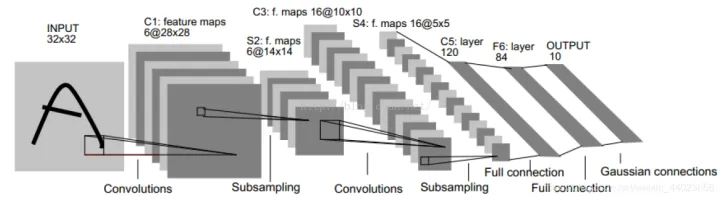

**如何定义自己的网络：**

1、需要继承nn.Module类，并实现forward方法。继承nn.Module类之后，在构造函数中要调用Module的构造函数, super(Linear, self).init()
一般把网络中具有可学习参数的层放在构造函数__init__()中。

2、不具有可学习参数的层（如ReLU）可放在构造函数中，也可不放在构造函数中（而在forward中使用nn.functional来代替）。可学习参数放在构造函数中，并且通过nn.Parameter()使参数以parameters（一种tensor,默认是自动求导）的形式存在Module中，并且通过parameters()或者named_parameters()以迭代器的方式返回可学习参数。

3、只要在nn.Module中定义了forward函数，**backward函数就会被自动实现（利用Autograd)**。而且一般不是显式的调用forward(layer.forward), 而是layer(input), 会自执行forward().

4、在forward中可以使用任何Tensor支持的函数，毕竟在整个pytorch构建的图中，是Tensor在流动。还可以使用if, for, print, log等python语法。

In [ ]:
import torch
import torch.nn as nn
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5,self).__init__()
        self.feature=nn.Sequential(
            nn.Conv2d(1,6,5,padding=2), #C1层
            nn.ReLU(),
            nn.MaxPool2d((2,2)),
            nn.Conv2d(6,16,5), #C1层
            nn.ReLU(),
            nn.MaxPool2d((2,2)),
            nn.Flatten(1,-1),
            nn.Linear(16*5*5,120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU()            
        )
        self.output=nn.Linear(84,10)
    def forward(self,x):
        x=self.feature(x)
        x=self.output(x)
        return x
    
lenet=LeNet5()  #创建一个LeNet5对象
print(lenet)  #打印网络

# 9.5 深度学习案例


基于AlexNet网络模型解决手写数字识别问题。
其具体过程是：先使用己经提供的训练数据对搭建好的神经网络模型进行训练并完成 参数优化：然后使用优化好的模型对测试数据进行预测，对比预测值和真实值之问的损失值，同时计算出结果预测的准确率。


In [ ]:
#1、加载数据集
#导入相关库
import torch
from torch import nn
import torchvision
from torchvision import datasets,transforms
import numpy as np
#创建数据预处理
trans=transforms.Compose([
    transforms.ToTensor(), #PIL.Image转换为Tensor
    transforms.Resize(size=(28,28)),  #对Tensor进行缩放操作
    transforms.Normalize((0.1307,),(0.3081,)) #归一化
])
#训练数据集的Dataset
train_data=datasets.MNIST(root='./data',train=True, download=True,transform=trans)
val_data=datasets.MNIST(root='./data',train=False, download=True,transform=trans)
#提示：其他常用数据集如：COCO、ImageNet、CIFCAR等都是通过这个方法快速下载和载入。

In [ ]:
#2、数据装载
train_loader=torch.utils.data.DataLoader(dataset=train_data,
                                        batch_size=32,
                                        num_workers=8,   #多线程
                                        shuffle=True)#
val_loader=torch.utils.data.DataLoader(dataset=val_data,
                                        batch_size=32,
                                        num_workers=4,
                                        shuffle=False)
# 若conda虚拟共享内存不足，可缩小batch_size或取消多线程

In [ ]:
#3、创建AlexNet网络模型
#定义AlexNet网络结构，继承于nn.Module类
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet,self).__init__()
        self.layer1=nn.Sequential(
            #卷积层，输入图像为28*28
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.MaxPool2d(kernel_size=2, stride=2),#池化层特征图通道数不变，每个特征图分辨率变小
            nn.ReLU(),#激活函数
        )
        self.layer2=nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3,padding=1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.ReLU(),
        )
        self.layer3=nn.Sequential(
            nn.Conv2d(64,128, kernel_size=3,padding=1),
            nn.ReLU(),
        )
        self.layer4=nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
        )
        self.layer5=nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3,padding=1),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.ReLU(),
            nn.Dropout(p=0.5),  #Dropout 机制  
        )
        self.dense=nn.Sequential(
            nn.Linear(256*3*3,1024, bias=True), 
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(1024,512, bias=True),
            nn.ReLU(),
            nn.Linear(512,10, bias=True)
        )                          
    def forward(self,x):
        x=self.layer1(x)
        x=self.layer2(x)
        x=self.layer3(x)
        x=self.layer4(x)
        x=self.layer5(x)
        x=x.view(-1,256*3*3)
        x=self.dense(x)
        return x
alexnet=AlexNet()
print(alexnet)

In [ ]:
#.4 创建损失函数和优化器
#将模型放在GPU上
if torch.cuda.is_available():
    alexnet=alexnet.cuda()
#交叉熵损失函数 
cirterion=torch.nn.CrossEntropyLoss()
#Adam优化算法
optimizer=torch.optim.Adam(alexnet.parameters(),lr=1e-3)

In [ ]:
# 5 模型训练和参数优化
#构建训练过程，总计训练10次数据 集，训练图片数为10000张
import time
start_time=time.time()

n_epochs=5
for epoch in range(n_epochs):
    #设置局部变量，用于计算总体损失和正确率
    #total_loss=0
    running_loss=0.0
    running_correct=0.0
    print(f"Epoch {epoch}/{n_epochs}")
    print("-"*20)
    for data in train_loader:
        x,y=data
        #将数据拷贝到GPU上
        if torch.cuda.is_available():    
            x=x.cuda()
            y=y.cuda()
        #前向传播得到预测值 
        y_hat=alexnet(x)
        _,pred=torch.max(y_hat.data,1)
        #计算局部损失和总体损失
        loss=cirterion(y_hat,y)
        #total_loss+=loss.cpu().item()
        #反向传播更新参数
        optimizer.zero_grad() #清空过往的梯度
        loss.backward()
        optimizer.step()
        running_loss+=loss.cpu().item()
        running_correct+=torch.sum(pred==y.data)
    testing_correct=0
    for data in val_loader:
        x_val,y_val=data   
        if torch.cuda.is_available():    
            x_val=x_val.cuda()
            y_val=y_val.cuda()
        y_hat=alexnet(x_val)
        _, pred=torch.max(y_hat.data,1)
        testing_correct+=torch.sum(pred==y_val.data)
    print("Loss is:{:.4f},Train Accuracy is:{:.4f}% ，Test Accuracy is:{:.4f}%".
          format(running_loss/len(train_data),100*running_correct/len(train_data),
          100*testing_correct/len(val_data)))
print(f"the total time: {time.time()-start_time}")

In [ ]:
#6 模型保存
#保存模型权重和网络设置
torch.save(alexnet,"./alexnet.pth")
#载入模型权重和网络设置
alexnet=torch.load("./alexnet.pth")

# 9.6 迁移学习



实际在深度神经网络算法的应用中，如果我们面对的是数据规模很大，那么在搭建好深度神经网络模型后，我们势必要花费大量的算力和时间去训练模型和优化参数，最后耗费了这么多资源得到的模型只能解决这一个问题，性价比非常低。如果我们用一个训练好的模型进行细微的调整来解决相似的问题，是不是可以？这就是迁移学习，最后取得的效果还很好。

前面，我们学会了使用手动搭建的Alexnet卷积神经网络模型解决手写图片识别的问题。下面我们引用迁移学习看准确 性还能提升多少？

### 迁移AlexNet

##### 1、首先要下载已经具备最优参数的模型。
这需要对我们之前使用的model=Models()代码部分进行替换，我们不需要再自己搭建和定义训练模型了。

In [ ]:
import torch
import torchvision
from torchvision import datasets,models,transforms
import os
import matplotlib.pyplot as plt
import time
from torch.autograd import Variable
model=models.alexnet(pretrained=True)
print(model)

##### 2、对当前迁移过来的模型进行微调
尽管问题具有相似性，但每个问题对最后输出的结果会有不一样的要求。调整最多的就是全连接的部分，其基本思路是冻结全连接层之前的全部网络层次，让这些被冻结的参数在模型训练中不进行梯度更新仅仅是没有被冻结的全连接层的全部参数。


In [ ]:
for param in model.parameters():
    param.requires_grad=False
model.features[0]=nn.Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
model.classifier=nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(9216, 4096),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096),
    nn. ReLU(),
    nn.Linear(4096, 10)
  )
print(model)


In [ ]:
#将模型放在GPU上
if torch.cuda.is_available():
    model=model.cuda()
#交叉熵损失函数 
cirterion=torch.nn.CrossEntropyLoss()
#Adam优化算法
optimizer=torch.optim.Adam(model.classifier.parameters(),lr=1e-3)


In [ ]:
import time
start_time=time.time()

n_epochs=5
for epoch in range(n_epochs):
    #设置局部变量，用于计算总体损失和正确率
    running_loss=0.0
    running_correct=0.0
    print(f"Epoch {epoch}/{n_epochs}")
    print("-"*20)
    for data in train_loader:
        x,y=data
        #将数据拷贝到GPU上
        if torch.cuda.is_available():    
            x=x.cuda()
            y=y.cuda()
        #前向传播得到预测值 
        y_hat=model(x)
        _,pred=torch.max(y_hat.data,1)
        #计算局部损失和总体损失
        loss=cirterion(y_hat,y)
        #反向传播更新参数
        optimizer.zero_grad() #清空过往的梯度
        loss.backward()
        optimizer.step()
        running_loss+=loss.cpu().item()
        running_correct+=torch.sum(pred==y.data)
    testing_correct=0
    for data in val_loader:
        x_val,y_val=data   
        if torch.cuda.is_available():    
            x_val=x_val.cuda()
            y_val=y_val.cuda()
        y_hat=model(x_val)
        _, pred=torch.max(y_hat.data,1)
        testing_correct+=torch.sum(pred==y_val.data)
    print("Loss is:{:.4f},Train Accuracy is:{:.4f}% ，Test Accuracy is:{:.4f}%".
          format(running_loss/len(train_data),100*running_correct/len(train_data),
          100*testing_correct/len(val_data)))
print(f"the total time: {time.time()-start_time}")